In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
xlsx_file = '/home/javid/NSW COVID-19.xlsx'
df = pd.read_excel(xlsx_file, sheet_name='TwoStates')
df

,Month,State,Unemployment Rate,Cases
0,2020-01-01,NSW,4.810016,1
1,2020-02-01,NSW,4.960711,0
2,2020-03-01,NSW,5.136094,2028
3,2020-04-01,NSW,6.289434,1176
4,2020-05-01,NSW,6.342252,84
5,2020-06-01,NSW,6.731502,98
6,2020-07-01,NSW,7.129822,378
7,2020-01-01,VIC,5.842322,2
8,2020-02-01,VIC,5.721062,4
9,2020-03-01,VIC,5.456389,910


In [80]:
NSW_df = df.loc[df['State'] == 'NSW'].copy()
NSW_df.loc[NSW_df['Cases'] == 0, 'Cases'] = 1
NSW_df['Log Cases'] = NSW_df['Cases'].apply(np.log)
NSW_df['Cum. Log Cases'] = NSW_df['Log Cases'].cumsum()
NSW_df

,Month,State,Unemployment Rate,Cases,Log Cases,Cum. Log Cases
0,2020-01-01,NSW,4.810016,1,0.000000,0.000000
1,2020-02-01,NSW,4.960711,1,0.000000,0.000000
2,2020-03-01,NSW,5.136094,2028,7.614805,7.614805
3,2020-04-01,NSW,6.289434,1176,7.069874,14.684679
4,2020-05-01,NSW,6.342252,84,4.430817,19.115496
5,2020-06-01,NSW,6.731502,98,4.584967,23.700464
6,2020-07-01,NSW,7.129822,378,5.934894,29.635358


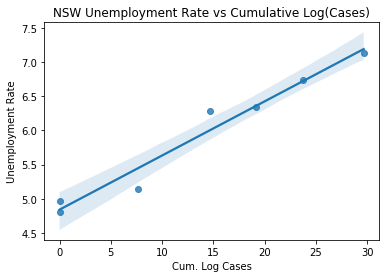

In [87]:
ax = sns.regplot(x="Cum. Log Cases", y="Unemployment Rate", data=NSW_df).set_title('NSW Unemployment Rate vs Cumulative Log(Cases)')

In [82]:
x = np.array(NSW_df['Cum. Log Cases']).reshape(-1, 1)
y = np.array(NSW_df['Unemployment Rate']).reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
NSW_df['Unemp. Rate Pred.'] = regr.predict(x)
print('Coefficient: %.4f' % regr.coef_)
print('Intercept: %.4f' % regr.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(NSW_df['Unemployment Rate'], NSW_df['Unemp. Rate Pred.']))
print('Coefficient of determination: %.2f' % r2_score(NSW_df['Unemployment Rate'], NSW_df['Unemp. Rate Pred.']))

Coefficient: 0.0793
Intercept: 4.8409
Mean squared error: 0.03
Coefficient of determination: 0.96


Therefore, the final regression model for NSW is 
$U_{t} = 4.84 + 0.079 \sum \limits _{j=1} ^{t} ln(C_{j}) $

In [86]:
VIC_df = df.loc[df['State'] == 'VIC'].copy()
VIC_df['Log Cases'] = VIC_df['Cases'].apply(np.log)
VIC_df['Cum. Log Cases'] = VIC_df['Log Cases'].cumsum()
VIC_df

,Month,State,Unemployment Rate,Cases,Log Cases,Cum. Log Cases
7,2020-01-01,VIC,5.842322,2,0.693147,0.693147
8,2020-02-01,VIC,5.721062,4,1.386294,2.079442
9,2020-03-01,VIC,5.456389,910,6.813445,8.892886
10,2020-04-01,VIC,6.129453,444,6.095825,14.988711
11,2020-05-01,VIC,6.645095,288,5.662960,20.651671
12,2020-06-01,VIC,7.131725,510,6.234411,26.886082
13,2020-07-01,VIC,6.743148,8418,9.038128,35.924209


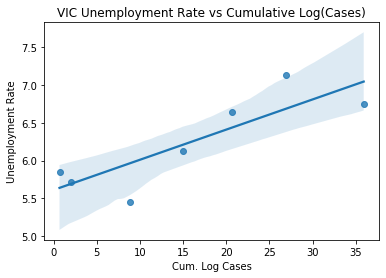

In [88]:
ax = sns.regplot(x="Cum. Log Cases", y="Unemployment Rate", data=VIC_df).set_title('VIC Unemployment Rate vs Cumulative Log(Cases)')

In [89]:
x = np.array(VIC_df['Cum. Log Cases']).reshape(-1, 1)
y = np.array(VIC_df['Unemployment Rate']).reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
VIC_df['Unemp. Rate Pred.'] = regr.predict(x)
print('Coefficient: %.4f' % regr.coef_)
print('Intercept: %.4f' % regr.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(VIC_df['Unemployment Rate'], VIC_df['Unemp. Rate Pred.']))
print('Coefficient of determination: %.2f' % r2_score(VIC_df['Unemployment Rate'], VIC_df['Unemp. Rate Pred.']))

Coefficient: 0.0400
Intercept: 5.6099
Mean squared error: 0.09
Coefficient of determination: 0.72


Therefore, the final regression model for VIC is 
$U_{t} = 5.61 + 0.040 \sum \limits _{j=1} ^{t} ln(C_{j}) $